In [ ]:
!pip install numpy
!pip install pandas
!pip install tensorflow
!pip install opencv-python

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os
import pickle

In [ ]:
df_train1 = pd.read_csv('/content/labels_1.csv', index_col='images')
df_train1


,label
images,
split11_1058.png,1
split11_979.png,1
split11_1064.png,1
split11_789.png,1
split11_951.png,1
...,...
split11_1055.png,1
split11_1733.png,1
split11_1727.png,1


In [ ]:
df_train0 = pd.read_csv('/content/labels_0.csv', index_col='images')
df_train0

,label
images,
frame_0028.jpg,0
frame_0014.jpg,0
v1_15_jpg.rf.b9cfa69954aa0f57b70d5c20ab441db8.jpg,0
v1_6_jpg.rf.5778019b607f9276218604aeb610a695.jpg,0
v1_55_jpg.rf.855356ecf885bfc77a26ebf9f0e71471.jpg,0
...,...
frame_0025.jpg,0
frame_0031.jpg,0
v1_58_jpg.rf.e7bbab80e3be0d4a6ec7fa13ff72d9ed.jpg,0


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['label']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'label'}, axis=1)
              .sort_values('label', ascending=True))
  xs = counted['label']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_train0.sort_values('label', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('label')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['label']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'label'}, axis=1)
              .sort_values('label', ascending=True))
  xs = counted['label']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('label', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('label')
_ = plt.ylabel('count()')

In [ ]:
train_images = []
train_labels = []
dataset_folder = '/content/drive/MyDrive/Colab Notebooks/Data-Sets/Ai-Project-Dataset/'
cnt = 0
for folder in os.listdir(dataset_folder):
    folder_path = os.path.join(dataset_folder, folder)
    if folder == 'Final_0' or folder == 'Final_1':
        for file in os.listdir(folder_path):
            cnt = cnt + 1
            if(cnt>3000):
              break
            img_path = os.path.join(folder_path, file)
            img = cv2.imread(img_path)
            # all good
            if img is not None:
                resized_img = cv2.resize(img, (100, 100))  # dimensions reshape
                train_images.append(resized_img)
                train_labels.append(df_train0.loc[file, 'label'] if folder == 'Final_0' else df_train1.loc[file, 'label'])
    else:
        pass

# list --> NumPy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

print('Shape of stacked train images:', train_images.shape)
print('Shape of train labels:', train_labels.shape)


Shape of stacked train images: (2999, 100, 100, 3)
Shape of train labels: (2999,)


In [ ]:
# Function to convert binary label into text
def get_label(num):
    if num == 0:
        return 'STANDING'
    if num == 1:
        return 'FALL'
    else:
        return -1

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, stratify=train_labels, test_size=0.2)

In [ ]:
X_train.shape

(2399, 100, 100, 3)

In [ ]:
def conv2d(filters: int, name):
    return Conv2D(filters=filters, kernel_size=(3, 3), padding='same', kernel_regularizer=l2(0.), bias_regularizer=l2(0.), name=name)

In [ ]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, ReLU
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.regularizers import l2

# fallnet architecture
model_input = Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]), name='inputs')

conv1 = conv2d(16, name='convoluton_1')(model_input)
act1 = ReLU(name='activation_1')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2), name='pooling_1')(act1)

conv2 = conv2d(16, name='convolution_2')(pool1)
act2 = ReLU(name='activation_2')(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2), name='pooling_2')(act2)

conv3 = conv2d(32, name='convolution_3')(pool2)
act3 = ReLU(name='activation_3')(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2), name='pooling_3')(act3)

conv4 = conv2d(32, name='convolution_4')(pool3)
act4 = ReLU(name='activation_4')(conv4)
pool4 = MaxPooling2D(pool_size=(2, 2), name='pooling_4')(act4)

conv5 = conv2d(64, name='convolition_5')(pool4)
act5 = ReLU(name='activation_5')(conv5)
pool5 = MaxPooling2D(pool_size=(2, 2), name='pooling_5')(act5)

conv6 = conv2d(64, name='convolution_6')(pool5)
act6 = ReLU(name='activation_6')(conv6)
pool6 = MaxPooling2D(pool_size=(2, 2), name='pooling_6')(act6)

flat = Flatten(name='flatten')(pool6)
dense1 = Dense(32, name='dense1')(flat)
output = Dense(1, activation='sigmoid', name='output')(dense1)

model = Model(inputs=[model_input], outputs=[output])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 100, 100, 3)]     0         
                                                                 
 convoluton_1 (Conv2D)       (None, 100, 100, 16)      448       
                                                                 
 activation_1 (ReLU)         (None, 100, 100, 16)      0         
                                                                 
 pooling_1 (MaxPooling2D)    (None, 50, 50, 16)        0         
                                                                 
 convolution_2 (Conv2D)      (None, 50, 50, 16)        2320      
                                                                 
 activation_2 (ReLU)         (None, 50, 50, 16)        0         
                                                                 
 pooling_2 (MaxPooling2D)    (None, 25, 25, 16)        0   

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train,y_train, epochs = 10, validation_data = (X_val, y_val))

Epoch 1/10
75/75 [==============================] - 23s 281ms/step - loss: 0.1662 - accuracy: 0.9608 - val_loss: 0.0855 - val_accuracy: 0.9533
Epoch 2/10
75/75 [==============================] - 22s 295ms/step - loss: 0.0434 - accuracy: 0.9867 - val_loss: 0.2915 - val_accuracy: 0.9633
Epoch 3/10
75/75 [==============================] - 23s 309ms/step - loss: 0.1248 - accuracy: 0.9712 - val_loss: 0.1880 - val_accuracy: 0.9383
Epoch 4/10
75/75 [==============================] - 24s 325ms/step - loss: 0.0985 - accuracy: 0.9733 - val_loss: 0.0156 - val_accuracy: 0.9967
Epoch 5/10
75/75 [==============================] - 21s 287ms/step - loss: 0.0102 - accuracy: 0.9967 - val_loss: 0.0173 - val_accuracy: 0.9950
Epoch 6/10
75/75 [==============================] - 21s 277ms/step - loss: 0.0047 - accuracy: 0.9992 - val_loss: 0.0093 - val_accuracy: 0.9967
Epoch 7/10
75/75 [==============================] - 20s 270ms/step - loss: 8.7419e-05 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 0.

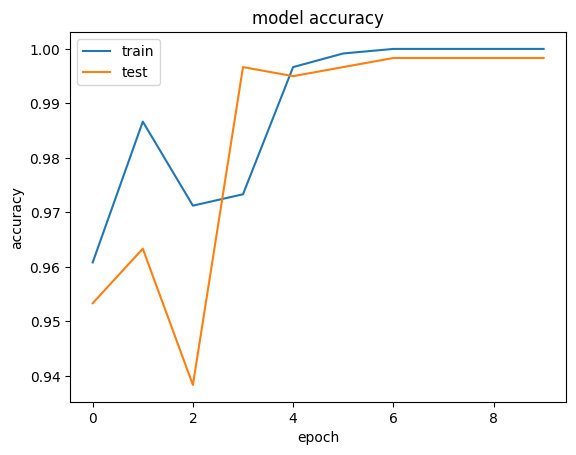

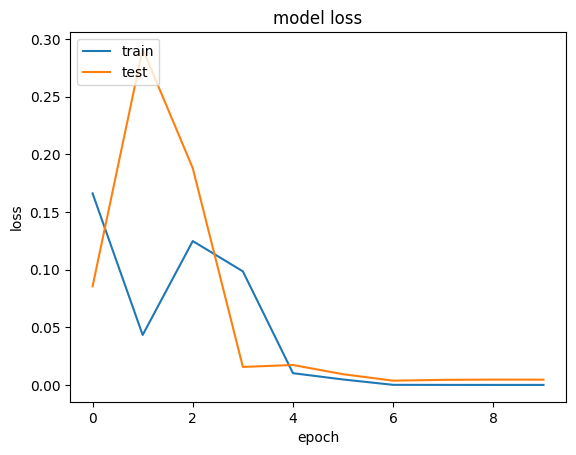

Weights saved.


In [ ]:
# accuracy wagera
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# loss related
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model.save('model.h5')
print('Weights saved.')

In [ ]:
cur_pred = []
#img = cv2.imread('/Users/ajaymaheshwari/Desktop/DEV/AI_Project/Ai-project-5thsem/CNN/input.jpg')
img = cv2.imread('test1.jpg')
print(img.shape)


resized_img = cv2.resize(img, (100,100) )
cur_pred = []
cur_pred.append(resized_img)
cur_pred = np.array(cur_pred)

print(cur_pred.shape)
predicted_labels = ( model.predict(cur_pred) >= 0.5).astype('int64')

predicted_labels.shape
get_label(predicted_labels[0])

(1980, 2972, 3)
(1, 100, 100, 3)
1/1 [==============================] - 0s 25ms/step


'STANDING'

In [ ]:
import pickle
from tensorflow.keras.models import load_model

# Save the model using pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

# To load the model back
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)


In [ ]:
import shutil
import os

shutil.make_archive('my_model', 'zip', 'my_model')

from google.colab import files
files.download('my_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>